In [ ]:
train_path = "drive/MyDrive/CottonPlantDiseases/Cotton Disease/train"
valid_path = "drive/MyDrive/CottonPlantDiseases/Cotton Disease/val"

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
folders = glob('drive/MyDrive/CottonPlantDiseases/Cotton Disease/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
val_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 253 images belonging to 4 classes.


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
61/61 [==============================] - 1292s 21s/step - loss: 5.9591 - accuracy: 0.3194 - val_loss: 1.3184 - val_accuracy: 0.3992
Epoch 2/10
61/61 [==============================] - 327s 5s/step - loss: 1.1515 - accuracy: 0.5296 - val_loss: 0.8360 - val_accuracy: 0.6166
Epoch 3/10
61/61 [==============================] - 326s 5s/step - loss: 0.8334 - accuracy: 0.6752 - val_loss: 0.6764 - val_accuracy: 0.7747
Epoch 4/10
61/61 [==============================] - 325s 5s/step - loss: 0.8198 - accuracy: 0.6864 - val_loss: 0.8901 - val_accuracy: 0.6245
Epoch 5/10
61/61 [==============================] - 326s 5s/step - loss: 0.8564 - accuracy: 0.6483 - val_loss: 0.7935 - val_accuracy: 0.6522
Epoch 6/10
61/61 [==============================] - 326s 5s/step - loss: 0.9317 - accuracy: 0.6495 - val_loss: 0.6749 - val_accuracy: 0.7589
Epoch 7/10
61/61 [==============================] - 325s 5s/step - loss: 0.8152 - accuracy: 0.6719 - val_loss: 0.8926 - val_accuracy: 0.6838
Epoch 8/10


In [ ]:
print("training_accuracy", r.history['accuracy'][-1])
print("validation_accuracy", r.history['val_accuracy'][-1])
print("loss", r.history['loss'][-1])

training_accuracy 0.6555612683296204
validation_accuracy 0.7628458738327026
loss 1.044671893119812


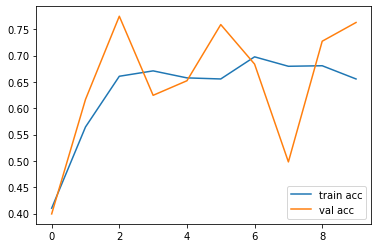

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

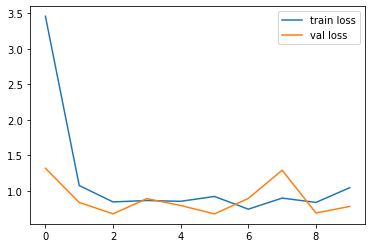

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
label = val_set.classes

In [ ]:
pred= model.predict(val_set)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (val_set.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[3 2 3 1 1 0 1 1 2 1 1 1 2 3 1 3 1 2 1 2 1 3 2 2 2 1 2 3 1 1 0 1 2 3 1 3 3
 2 1 2 2 1 1 1 2 1 1 1 2 2 1 1 3 2 1 1 2 2 3 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2
 3 3 1 3 1 1 0 1 1 2 1 3 1 2 3 1 1 3 1 1 2 1 3 3 1 3 1 0 1 0 2 2 0 1 3 1 3
 1 1 1 2 0 1 1 1 2 1 1 2 1 1 2 2 1 1 2 3 3 3 2 1 1 3 1 1 0 2 3 1 1 3 2 2 2
 2 1 2 3 2 1 1 2 2 0 1 1 3 2 1 1 1 1 2 2 2 3 2 2 1 1 2 2 0 2 1 2 0 3 3 1 1
 2 1 1 1 2 3 1 2 1 1 3 0 2 2 1 2 2 3 2 1 2 1 1 3 2 1 2 0 2 3 2 1 3 1 1 3 2
 1 1 1 2 1 2 1 1 1 1 0 1 1 1 2 1 1 1 2 3 2 3 1 0 1 1 2 2 3 2 0]
{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
['fresh cotton plant', 'fresh cotton leaf', 'fresh cotton plant', 'diseased cotton plant', 'diseased cotton plant', 'diseased cotton leaf', 'diseased cotton plant', 'diseased cotton plant', 'fresh cotton leaf', 'diseased cotton plant', 'diseased cotton plant', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant', 'diseased cotton plant', 'fresh cotton plant', 'dise

In [ ]:
model.save('CottonPlantResNet50.hdf5')